In [ ]:
import os
import kagglehub

# Locate dataset path
dataset_path = kagglehub.dataset_download("redwankarimsony/top-100-hubble-telescope-images")
print("Dataset downloaded to:", dataset_path)

# List files to verify
print("Files in dataset:", os.listdir(dataset_path))


Dataset downloaded to: /root/.cache/kagglehub/datasets/redwankarimsony/top-100-hubble-telescope-images/versions/1
Files in dataset: ['potw1346a.tif', 'heic0910s.tif', 'heic0108a.tif', 'heic0910i.tif', 'heic0822b.tif', 'heic1406a.tif', 'heic1104a.tif', 'heic1501a.tif', 'opo0511a.tif', 'heic0514a.tif', 'potw1804a.tif', 'heic0911b.tif', 'heic0506a.tif', 'potw1751a.tif', 'heic0515a.tif', 'opo1438b.tif', 'opo9433a.tif', 'heic1716a.tif', 'heic0604a.tif', 'heic0707a.tif', 'heic1007a.tif', 'potw1441a.tif', 'potw1020a.tif', 'opo0123a.tif', 'heic0817a.tif', 'heic1814b.tif', 'heic1410a.tif', 'heic1815a.tif', 'potw1451a.tif', 'heic1806a.tif', 'heic1808a.tif', 'heic0602a.tif', 'potw1752b.tif', 'heic0503a.tif', 'heic0910h.tif', 'opo9941a.tif', 'heic0910e.tif', 'opo0624a.tif', 'heic1707a.tif', 'heic1608a.tif', 'opo0212a.tif', 'heic1516a.tif', 'heic1302a.tif', 'heic1110a.tif', 'opo0010a.tif', 'opo0501a.tif', 'heic0206a.tif', 'potw1822a.tif', 'potw1802a.tif', 'heic1520a.tif', 'heic1518a.tif', 'potw1752

In [ ]:
!pip install imagecodecs
import os
import kagglehub
import cv2
import numpy as np
import tifffile as tiff
from tqdm import tqdm
import glob
import imagecodecs # Make sure imagecodecs is imported here
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# Locate dataset path
dataset_path = kagglehub.dataset_download("redwankarimsony/top-100-hubble-telescope-images")
print("Dataset downloaded to:", dataset_path)

# List files to verify
print("Files in dataset:", os.listdir(dataset_path))

# Set paths
processed_path = "hubble_preprocessed/"
os.makedirs(processed_path, exist_ok=True)

# Process each .tif image
for img_name in tqdm(glob.glob(os.path.join(dataset_path, "*.tif"))):
    # Read .tif image
    img = tiff.imread(img_name)

    # Convert to grayscale if necessary
    if len(img.shape) == 3:  # Check if it's an RGB(A) image
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Resize to 128x128
    img = cv2.resize(img, (128, 128))

    # Normalize pixel values
    img = img / 255.0

    # Save preprocessed image in .png format for compatibility
    output_path = os.path.join(processed_path, os.path.basename(img_name).replace(".tif", ".png"))
    cv2.imwrite(output_path, img * 255)

print("Preprocessing complete. Images saved in:", processed_path)

# Custom Dataset Class
class HubbleDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image, image  # Input and output are the same for Autoencoder

# Load Dataset
image_paths = glob.glob("hubble_preprocessed/*.png")
transform = transforms.Compose([transforms.ToTensor()])
dataset = HubbleDataset(image_paths, transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


Dataset downloaded to: /root/.cache/kagglehub/datasets/redwankarimsony/top-100-hubble-telescope-images/versions/1
Files in dataset: ['potw1346a.tif', 'heic0910s.tif', 'heic0108a.tif', 'heic0910i.tif', 'heic0822b.tif', 'heic1406a.tif', 'heic1104a.tif', 'heic1501a.tif', 'opo0511a.tif', 'heic0514a.tif', 'potw1804a.tif', 'heic0911b.tif', 'heic0506a.tif', 'potw1751a.tif', 'heic0515a.tif', 'opo1438b.tif', 'opo9433a.tif', 'heic1716a.tif', 'heic0604a.tif', 'heic0707a.tif', 'heic1007a.tif', 'potw1441a.tif', 'potw1020a.tif', 'opo0123a.tif', 'heic0817a.tif', 'heic1814b.tif', 'heic1410a.tif', 'heic1815a.tif', 'potw1451a.tif', 'heic1806a.tif', 'heic1808a.tif', 'heic0602a.tif', 'potw1752b.tif', 'heic0503a.tif', 'heic0910h.tif', 'opo9941a.tif', 'heic0910e.tif', 'opo0624a.tif', 'heic1707a.tif', 'heic1608a.tif', 'opo0212a.tif', 'heic1516a.tif', 'heic1302a.tif', 'heic1110a.tif', 'opo0010a.tif', 'opo0501a.tif', 'heic0206a.tif', 'potw1822a.tif', 'potw1802a.tif', 'heic1520a.tif', 'heic1518a.tif', 'potw1752

100%|██████████| 99/99 [02:10<00:00,  1.32s/it]

Preprocessing complete. Images saved in: hubble_preprocessed/


In [ ]:
from torchmetrics.image import StructuralSimilarityIndexMeasure
from torchvision import models

# Define SSIM loss function
ssim_loss = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

# Load Pre-trained VGG for Perceptual Loss
vgg = models.vgg16(pretrained=True).features[:8].to(device).eval()

def perceptual_loss(output, target):
    with torch.no_grad():
        output_features = vgg(output.repeat(1, 3, 1, 1))  # Convert grayscale to 3 channels
        target_features = vgg(target.repeat(1, 3, 1, 1))
    return F.mse_loss(output_features, target_features)

def combined_loss(output, target):
    mse = F.mse_loss(output, target)  # MSE Loss
    ssim = ssim_loss(output, target)  # SSIM Score (higher is better)
    perceptual = perceptual_loss(output, target)  # High-level texture loss
    return mse + (1 - ssim) + 0.1 * perceptual  # Balance weights


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 146MB/s]


In [ ]:
def rle_encode(input_string):
    if not input_string:
        return ""

    encoded_string = ""
    count = 1
    prev_char = input_string[0]

    for char in input_string[1:]:
        if char == prev_char:
            count += 1
        else:
            encoded_string += str(count) + prev_char
            prev_char = char
            count = 1

    encoded_string += str(count) + prev_char  # Add the last sequence
    return encoded_string

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels),
        )

    def forward(self, x):
        return x + self.conv(x)  # Skip connection

class ImprovedAutoencoder(nn.Module):
    def __init__(self):
        super(ImprovedAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=1),  # Convert grayscale to RGB for perceptual loss
            nn.Conv2d(3, 64, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),
            ResidualBlock(64),

            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(128),
            ResidualBlock(128),

            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(256),
            ResidualBlock(256),

            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(512),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(256),
            ResidualBlock(256),

            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(128),
            ResidualBlock(128),

            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),
            ResidualBlock(64),

            nn.ConvTranspose2d(64, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()  # Better than Sigmoid for stability
        )

        self.final_conv = nn.Conv2d(3, 1, kernel_size=1)  # Convert back to grayscale

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return self.final_conv(x)

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()  # Keep MSE as a base loss
optimizer = optim.Adam(model.parameters(), lr=0.0005)

num_epochs = 30  # Increased epochs for better learning

for epoch in range(num_epochs):
    total_loss = 0
    for img, _ in dataloader:
        img = img.to(device)
        optimizer.zero_grad()

        output = model(img)
        loss = combined_loss(output, img)  # Use combined SSIM + MSE loss

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(dataloader):.4f}")

# Save improved model
torch.save(model.state_dict(), "hubble_improved_autoencoder.pth")
print("Training Complete & Model Saved!")

Epoch [1/30], Loss: 2.5229
Epoch [2/30], Loss: 1.4154
Epoch [3/30], Loss: 1.1010
Epoch [4/30], Loss: 0.9876
Epoch [5/30], Loss: 1.0713
Epoch [6/30], Loss: 1.0542
Epoch [7/30], Loss: 0.9586
Epoch [8/30], Loss: 1.0122
Epoch [9/30], Loss: 0.9185
Epoch [10/30], Loss: 0.9517
Epoch [11/30], Loss: 0.9020
Epoch [12/30], Loss: 0.8999
Epoch [13/30], Loss: 0.8560
Epoch [14/30], Loss: 0.9544
Epoch [15/30], Loss: 0.8277
Epoch [16/30], Loss: 0.7850
Epoch [17/30], Loss: 0.7808
Epoch [18/30], Loss: 0.8257
Epoch [19/30], Loss: 0.8012
Epoch [20/30], Loss: 0.7839
Epoch [21/30], Loss: 0.7673
Epoch [22/30], Loss: 0.7870
Epoch [23/30], Loss: 0.7045
Epoch [24/30], Loss: 0.6923
Epoch [25/30], Loss: 0.7132
Epoch [26/30], Loss: 0.6903
Epoch [27/30], Loss: 0.7068
Epoch [28/30], Loss: 0.7053
Epoch [29/30], Loss: 0.6643
Epoch [30/30], Loss: 0.6674
Training Complete & Model Saved!


In [ ]:
if not os.path.exists('hubble_preprocessed/sample.png'):
         # Assuming there is at least one image in the folder, copy it and rename it
         all_images = os.listdir('hubble_preprocessed')
         if all_images:
             os.rename(os.path.join('hubble_preprocessed', all_images[0]), 'hubble_preprocessed/sample.png')
             print(f"Renamed {all_images[0]} to sample.png")
         else:
             print("Error: No images in hubble_preprocessed folder.")
# Load Model for Inference
model.load_state_dict(torch.load("hubble_improved_autoencoder.pth"))
model.eval()

# Load an image for compression
test_image = Image.open("hubble_preprocessed/sample.png").convert("L")
test_image = transform(test_image).unsqueeze(0).to(device)

# Encode and Decode
with torch.no_grad():
    compressed_image = model.encoder(test_image)
    reconstructed_image = model.decoder(compressed_image)

# Convert tensor to image
reconstructed_image = reconstructed_image.squeeze().cpu().numpy() * 255
cv2.imwrite("hubble_reconstructed.png", reconstructed_image)
print("Compressed & Reconstructed Image Saved!")

# Load Model for Inference
model.load_state_dict(torch.load("hubble_improved_autoencoder.pth"))
model.eval()

Compressed & Reconstructed Image Saved!


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2)
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): LeakyReLU(negative_slope=0.2)
    (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
   

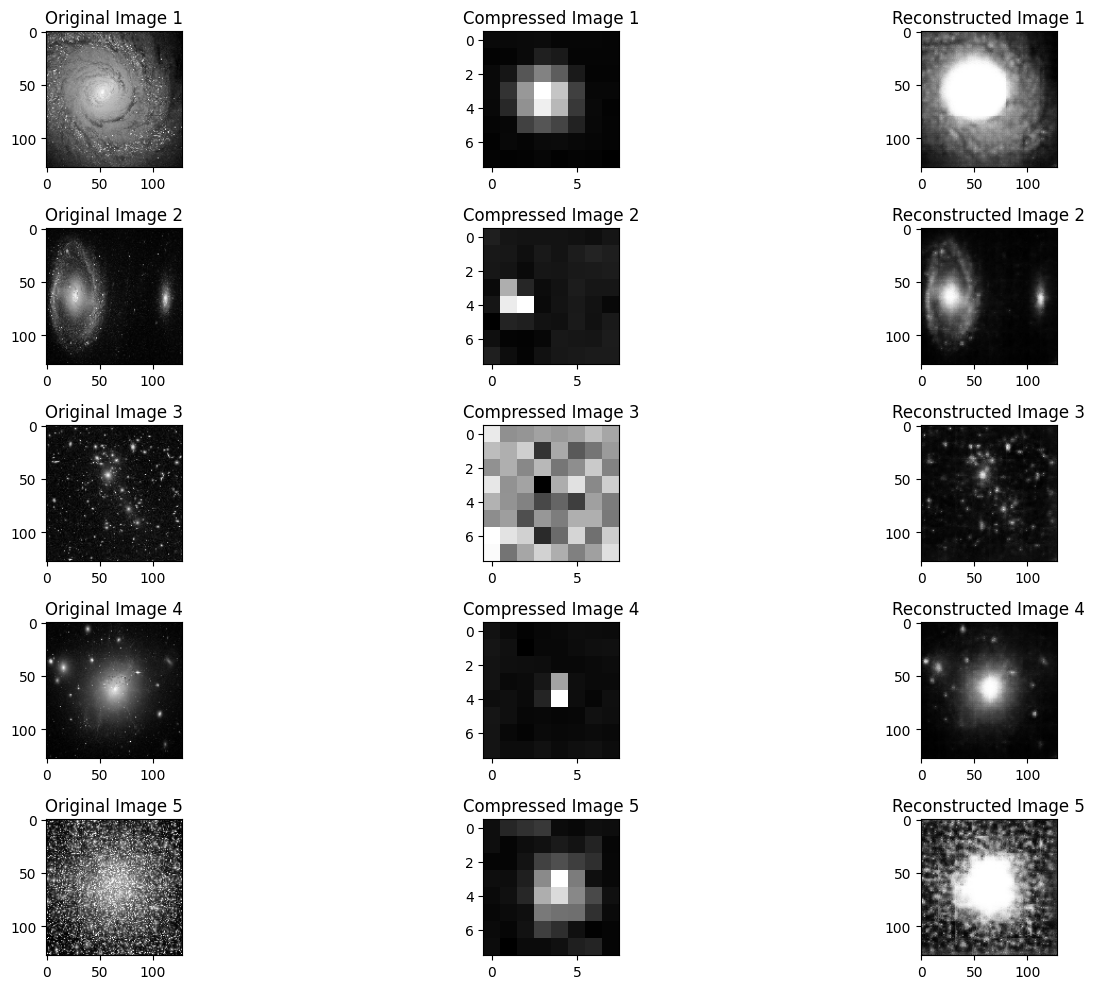

In [ ]:
# Select 5 random images for compression and reconstruction
image_paths = glob.glob("hubble_preprocessed/*.png")
random_image_paths = random.sample(image_paths, 5)

# Process and plot each random image
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(random_image_paths):
    # Load image
    test_image = Image.open(img_path).convert("L")
    test_image = transform(test_image).unsqueeze(0).to(device)

    # Encode and Decode
    with torch.no_grad():
        compressed_image = model.encoder(test_image)
        reconstructed_image = model.decoder(compressed_image)

    # Convert tensors to NumPy arrays
    original_image = np.array(Image.open(img_path))
    reconstructed_image = reconstructed_image.squeeze().cpu().numpy() * 255
    compressed_image_np = compressed_image.squeeze().cpu().numpy() # Convert compressed image to numpy array

    # Plotting - Displaying Compressed Image
    plt.subplot(5, 3, 3*i + 1) # Adjust subplot grid to show three images per row
    plt.imshow(original_image, cmap='gray')
    plt.title(f"Original Image {i+1}")

    plt.subplot(5, 3, 3*i + 2) # Display compressed image (e.g., first channel if multi-channel)
    plt.imshow(compressed_image_np[0], cmap='gray') # Display first channel
    plt.title(f"Compressed Image {i+1}")

    plt.subplot(5, 3, 3*i + 3)  # Subplot for reconstructed image
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstructed Image {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
!pip install --upgrade imagecodecs # Upgrade imagecodecs to ensure the dependency is available and correct.
!pip install --force-reinstall tifffile # Force reinstall tifffile in case previous installation is faulty or didn't use the updated imagecodecs.
!pip install torchmetrics